In [1]:
data_path = "/Users/changxin/Documents/0current/gene"

In [36]:
import os
map_name = os.path.join(data_path, "hapmap1.map")
ped_name = os.path.join(data_path, "hapmap1.ped")
map_in = open(map_name)
ped_in = open(ped_name)

In [51]:
maps = list()
map_in = open(map_name)
for line in map_in:
    line = line.replace("\n","").split(" ")
    maps.append(line)

In [62]:
peds = list()
ped_in = open(ped_name)
for line in ped_in:
    line = line.replace("\n","").split(" ")
    peds.append(line)
peds = pd.DataFrame(peds)

In [55]:
map_columns = ["chromosome", "rs", "genetic_distance", "NCBI"]

In [57]:
import pandas as pd
import numpy as np

In [58]:
maps = pd.DataFrame(maps, columns=map_columns)

In [60]:
maps.columns

Index(['chromosome', 'rs', 'genetic_distance', 'NCBI'], dtype='object')

In [61]:
maps.tail(5)

,chromosome,rs,genetic_distance,NCBI
83529,22,rs2269380,0,83530
83530,22,rs6151412,0,83531
83531,22,rs11912064,0,83532
83532,22,rs1001469,0,83533
83533,22,rs756638,0,83534


In [66]:
print(peds.tail(1))

    0      1      2      3      4      5      6      7      8      9       \
88  JPT269      1      0      0      1      2      2      2      2      2   

    ...   167064 167065 167066 167067 167068 167069 167070 167071 167072  \
88  ...        2      2      2      2      2      2      1      2      1   

   167073  
88      2  

[1 rows x 167074 columns]


In [68]:
peds.columns


RangeIndex(start=0, stop=167074, step=1)

Automatically created module for IPython interactive environment


/Users/changxin/.virtualenvs/handson/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


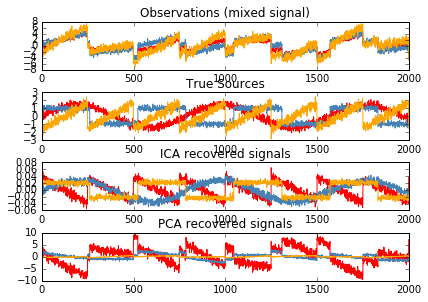

In [69]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

In [81]:
ped_np = np.array(peds)
ped_no = ped_np[:,0]
ped_np[:,1:]

array([['1', '0', '0', ..., '2', '2', '2'],
       ['1', '0', '0', ..., '2', '2', '2'],
       ['1', '0', '0', ..., '2', '1', '2'],
       ..., 
       ['1', '0', '0', ..., '2', '1', '2'],
       ['1', '0', '0', ..., '2', '2', '2'],
       ['1', '0', '0', ..., '2', '1', '2']], dtype=object)

In [101]:
ica = FastICA(n_components=80000)
S = ica.fit_transform(ped_np[:,1:])
A = ica.mixing_


/Users/changxin/.virtualenvs/handson/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:296: UserWarning: n_components is too large: it will be set to 89
  warnings.warn('n_components is too large: it will be set to %s' % n_components)


/Users/changxin/.virtualenvs/handson/lib/python3.6/site-packages/sklearn/decomposition/fastica_.py:116: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


In [102]:
A.shape
S.shape

(167073, 89)

(89, 89)

TypeError: 'FastICA' object is not subscriptable

In [113]:
peds[0].unique().__len__()

89